In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_data = pd.read_csv(url)

In [ ]:
country = 'United States'
us_data = covid_data[covid_data['location'] == country]

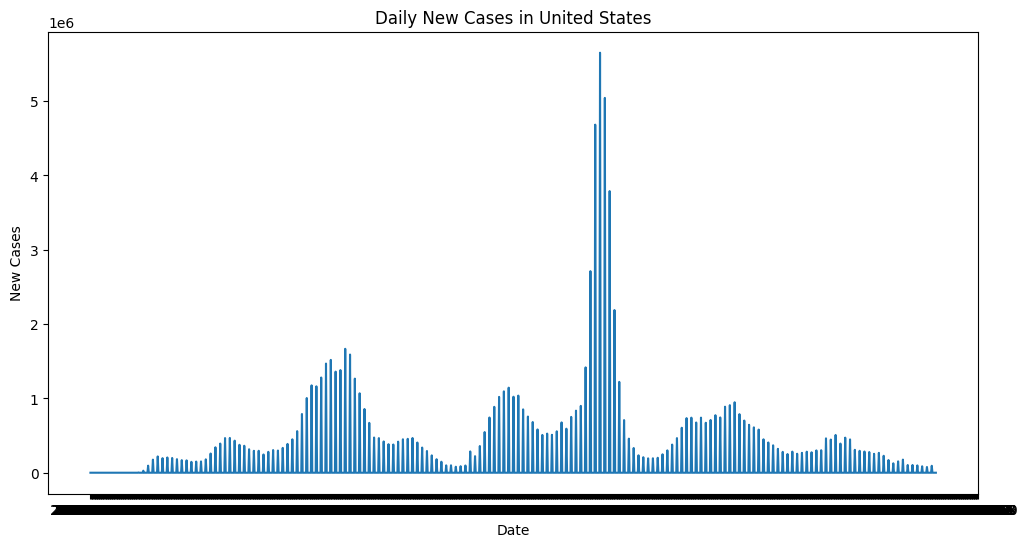

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(us_data['date'], us_data['new_cases'])
plt.title(f'Daily New Cases in {country}')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

In [ ]:
print(covid_data.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
print(covid_data.head(5))


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
columns_to_display = ['location', 'date', 'new_cases', 'total_cases']
print("\nData from specific columns:")
print(covid_data[columns_to_display].head())


Data from specific columns:
      location        date  new_cases  total_cases
0  Afghanistan  2020-01-05        0.0          NaN
1  Afghanistan  2020-01-06        0.0          NaN
2  Afghanistan  2020-01-07        0.0          NaN
3  Afghanistan  2020-01-08        0.0          NaN
4  Afghanistan  2020-01-09        0.0          NaN


In [ ]:
num_rows, num_columns = covid_data.shape



In [ ]:
print("Number of rows:", num_rows)


Number of rows: 380586


In [ ]:
print("Number of rows:", num_columns)


Number of rows: 67


In [ ]:
top_countries = covid_data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)


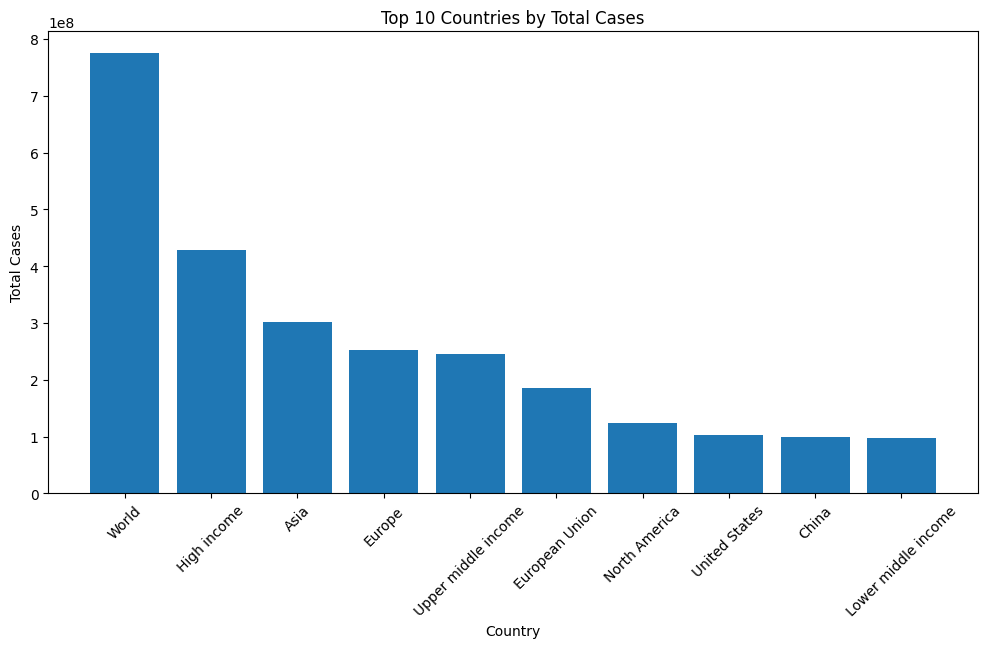

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 Countries by Total Cases')
plt.show()

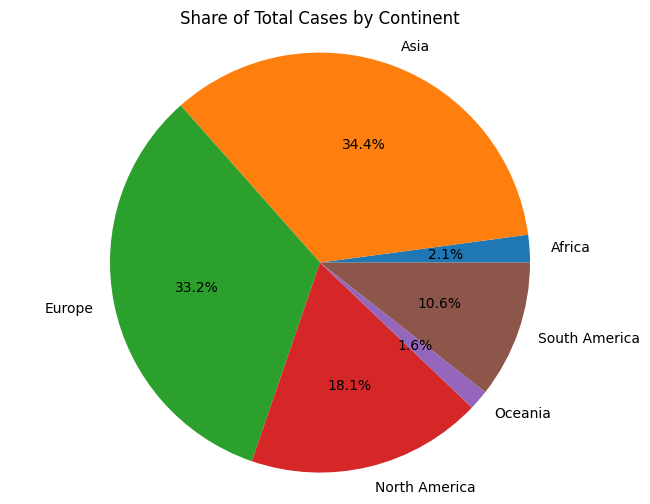

In [ ]:
# Group the data by continent and sum the total cases
continent_cases = covid_data.groupby('continent')['total_cases'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(continent_cases['total_cases'], labels=continent_cases['continent'], autopct='%1.1f%%')
plt.title('Share of Total Cases by Continent')
plt.axis('equal')
plt.show()

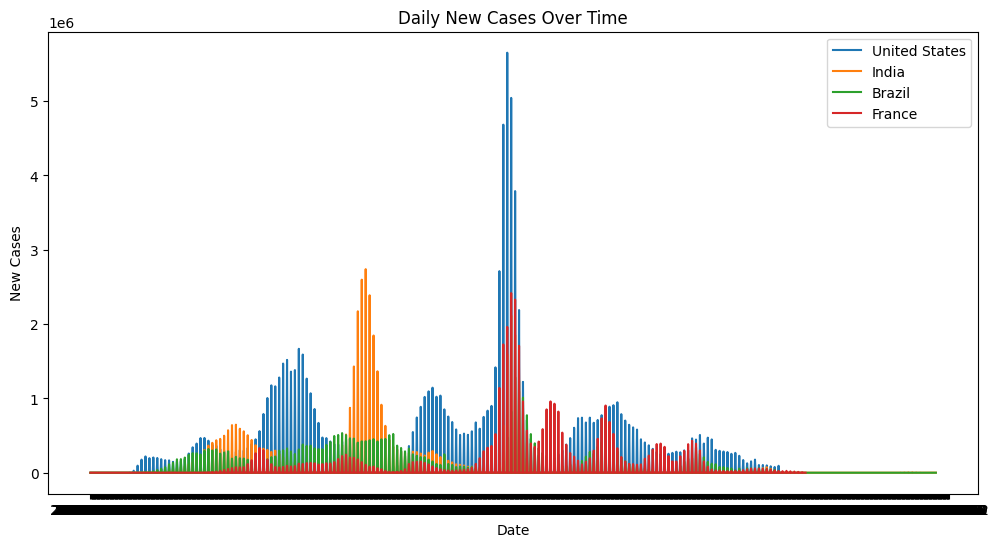

In [ ]:
# Select a few countries
countries = ['United States', 'India', 'Brazil', 'France']

# Filter the data for selected countries
selected_data = covid_data[covid_data['location'].isin(countries)]

# Create a line plot
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New Cases Over Time')
plt.legend()
plt.show()

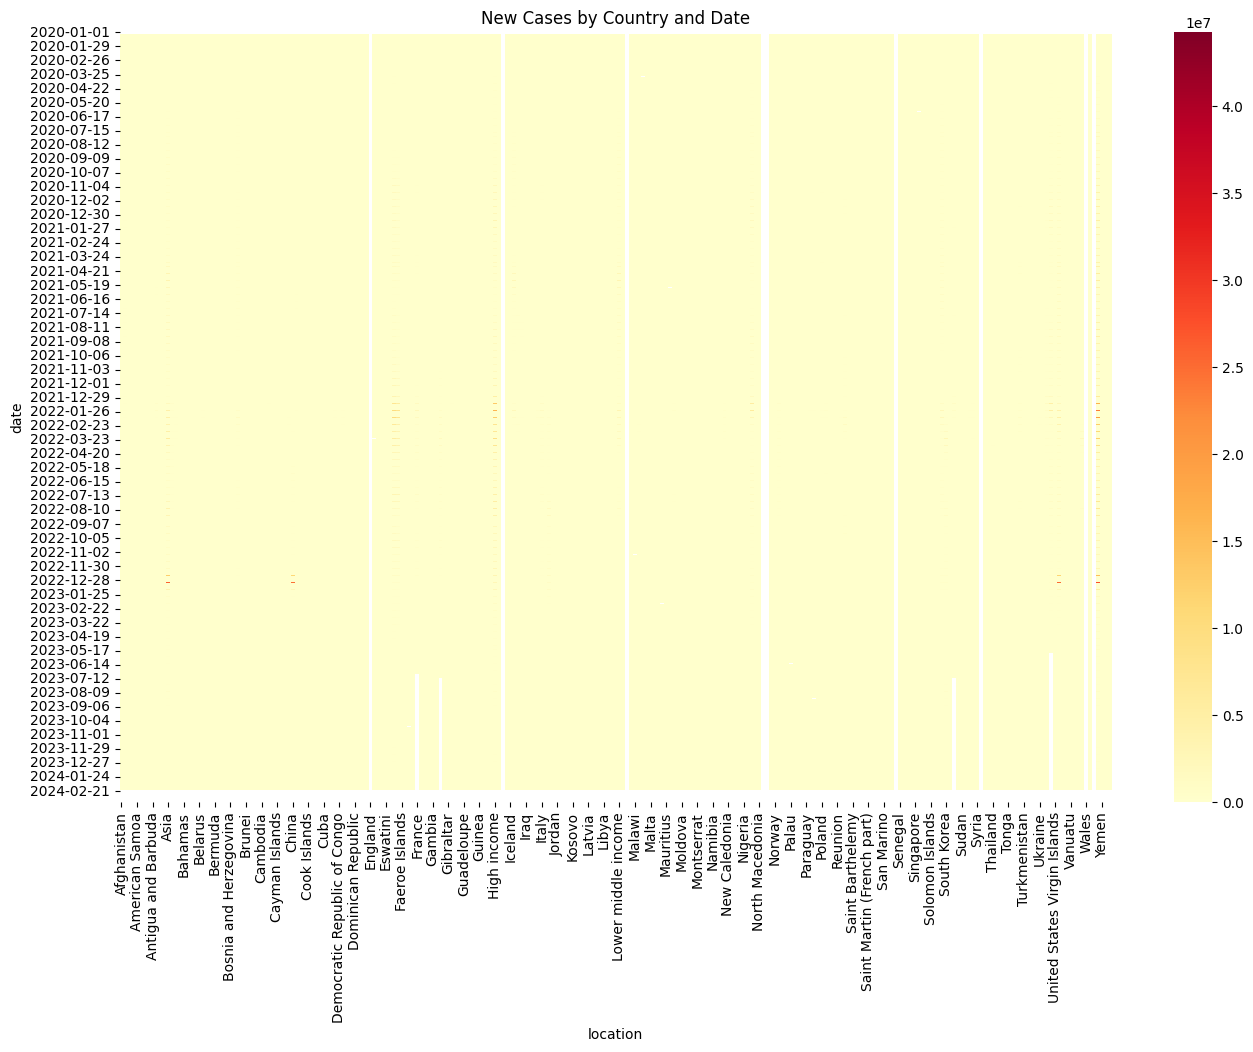

In [ ]:
import seaborn as sns

# Pivot the data to create a matrix of new cases by country and date
pivot_data = covid_data.pivot(index='date', columns='location', values='new_cases')

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_data, annot=False, cmap="YlOrRd")
plt.title('New Cases by Country and Date')
plt.show()

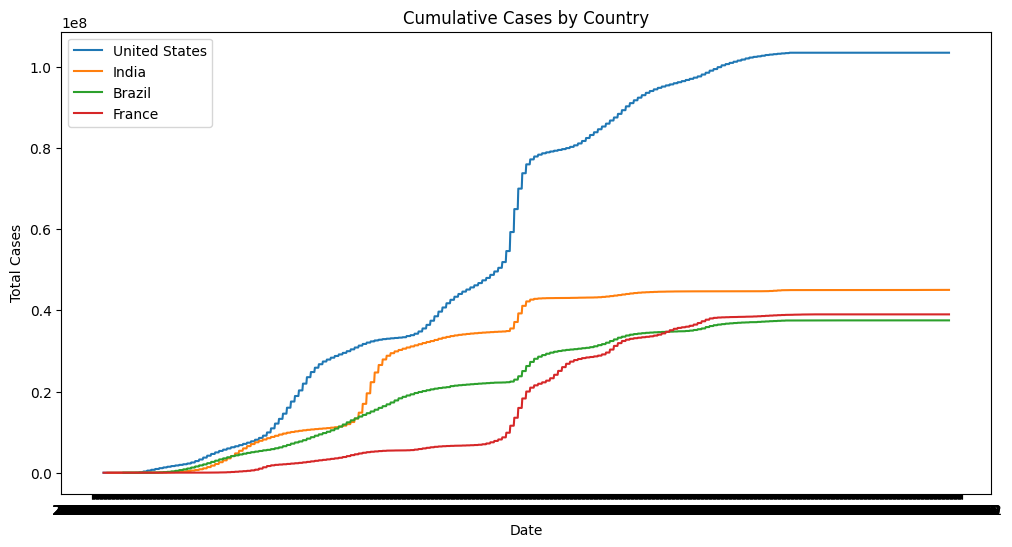

In [ ]:
# Select a few countries
countries = ['United States', 'India', 'Brazil', 'France']

# Filter the data for selected countries
selected_data = covid_data[covid_data['location'].isin(countries)]

# Create a stacked area chart
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected_data[selected_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Cumulative Cases by Country')
plt.legend()
plt.show()

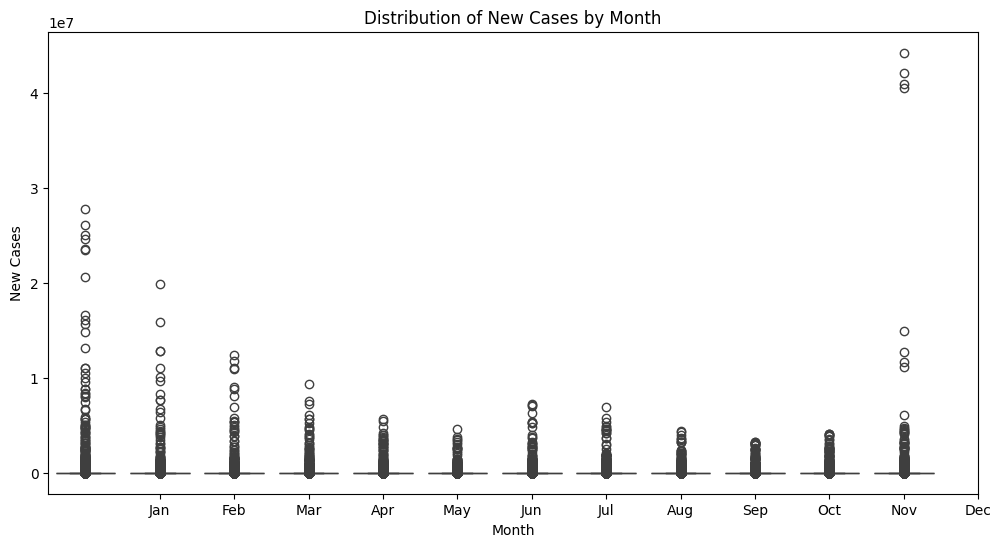

In [ ]:
# Convert the date column to datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Add a month column
covid_data['month'] = covid_data['date'].dt.month

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='new_cases', data=covid_data)
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.title('Distribution of New Cases by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()